# Visualización de datos con Pandas

## Sobrevivientes del Titanic

La idea es trabajar con la visualización de datos, utilizando este conjunto de datos provisto por
Kaggle. Se trata de la lista de pasajeros reales del Titanic, indicando: sexo, edad, costo del
pasaje, número y clase de cabina, etc. e indicando si sobrevivió o no.

Data set [Titanic](https://www.kaggle.com/c/titanic/data)

In [80]:
# Datos
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Datos
from sklearn import datasets

In [81]:
df = pd.read_csv("./dataset/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## b) Cantidad de pasajeros por género:

In [82]:
# Cantidad de pasajeros por género:
passenger_sex = df.groupby('Sex')['PassengerId'].count()
passenger_sex

Sex
female    314
male      577
Name: PassengerId, dtype: int64

## c) Cantidad de pasajeros que sobrevivieron por género

In [83]:
# Cantidad de pasajeros que sobrevivieron por género
survived_sex = df.groupby('Sex')['Survived'].sum()
survived_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

## d) Graficar pasajeros totales por género

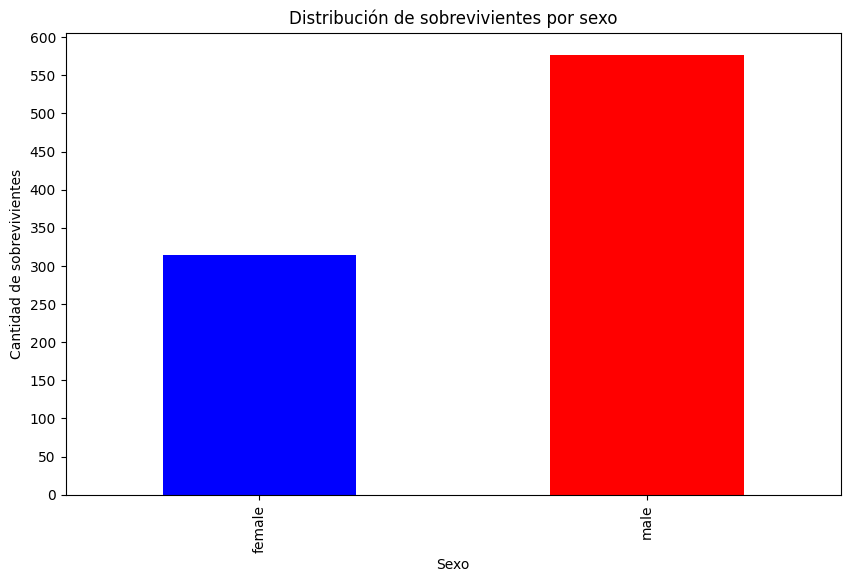

In [84]:
plt.figure(figsize=(10, 6))
passenger_sex.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de sobrevivientes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de sobrevivientes')
plt.yticks(np.arange(0, 650, 50))
plt.show()

## e) Graficar pasajeros sobrevivientes por género

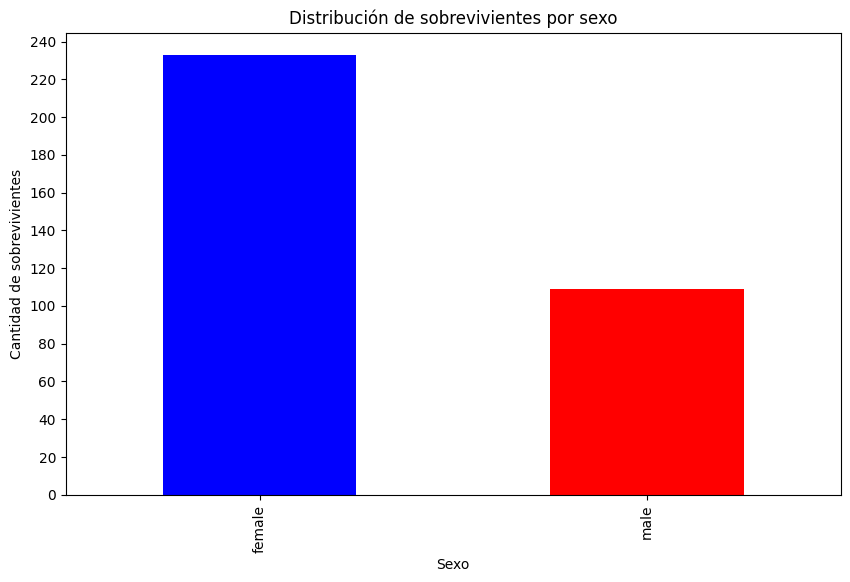

In [85]:
# Usamos el metodo plot de la serie survived_sex.
plt.figure(figsize=(10, 6))
survived_sex.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de sobrevivientes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de sobrevivientes')
plt.yticks(np.arange(0, 260, 20))
plt.show()

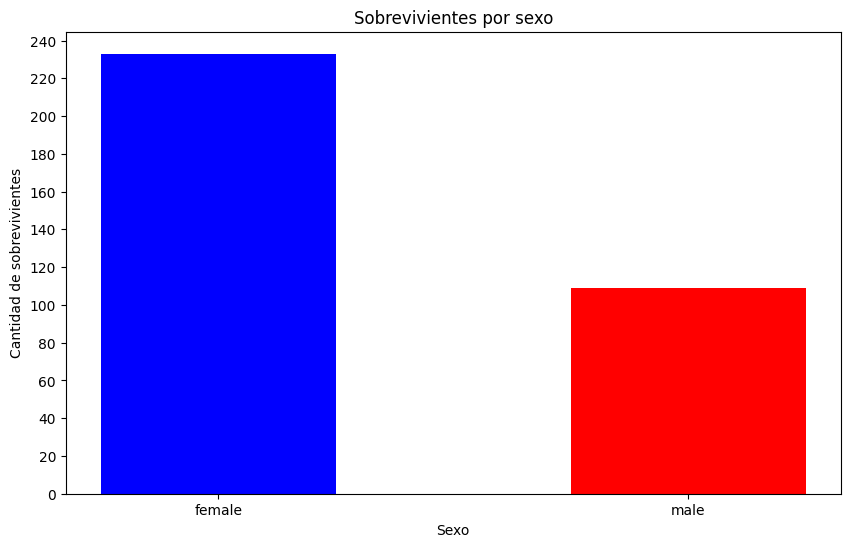

In [86]:
# Usamos la función bar de matplotlib.pyplot, que es una librería de gráficos.
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(survived_sex.index, survived_sex, width=0.5, color=['blue', 'red'])
plt.title('Sobrevivientes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de sobrevivientes')
plt.yticks(np.arange(0, 260, 20))
plt.show()

## f) Graficar % de pasajeros sobrevivientes por género

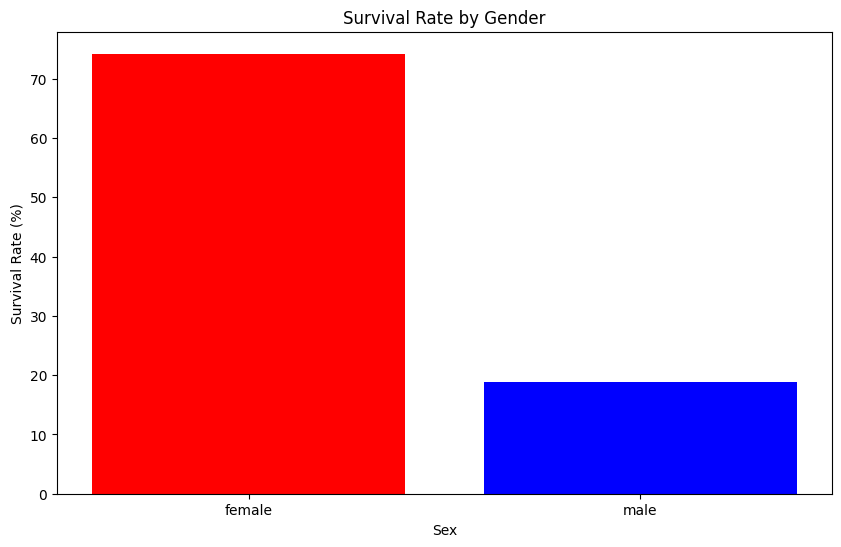

In [87]:
# Graficar % de pasajeros sobrevivientes por género
survival_rate = df.groupby('Sex')['Survived'].mean() * 100

# Crear un gráfico de barras con los porcentajes de sobrevivientes por género
plt.figure(figsize=(10, 6))
plt.bar(survival_rate.index, survival_rate.values, color=['red', 'blue'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Gender')
plt.show()

## g) Cantidad de sobrevivientes por edad

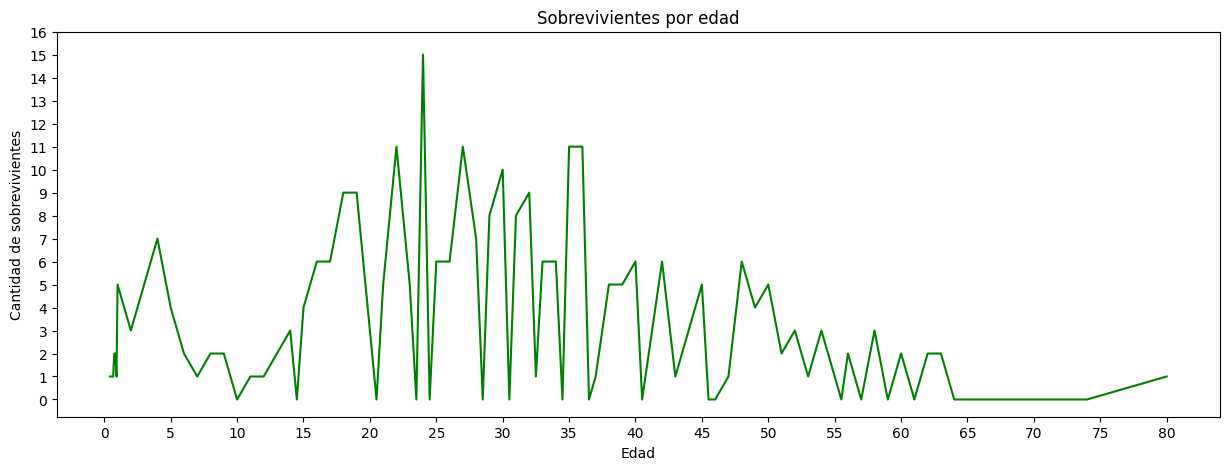

In [88]:
# Cantidad de sobrevivientes por edad
survival_edad = df.groupby('Age')['Survived'].sum()

# Graficamos
survival_edad.plot(kind='line', figsize=(15, 5), color='green')
plt.title('Sobrevivientes por edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de sobrevivientes')
plt.xticks(np.arange(0, 85, 5))
plt.yticks(np.arange(0, 17, 1))
plt.show()


## h) Crear una nueva columna que se una categoría


Crear una nueva columna que se una categoría, utilizando la edad y estos
criterios:
- Age > 0 and 'Age <= 10: return 'kid'
- Age > 10 and Age <= 18: return 'young'
- Age > 18 and Age <= 60: return 'adult'
- else return 'senior'

In [89]:
def filtro_edad(x):
    if x > 0 and x <= 10:
        return 'kid'
    elif x > 10 and x <= 18:
        return 'young'
    elif x > 18 and x <= 60:
        return 'adult'
    else:
        return 'senior'

In [90]:
df['Category'] = df['Age'].apply(filtro_edad)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


## i) Graficar la nueva columna, ordenada por barras según los sobrevivientes

In [91]:
survival_category = df.groupby('Category')['Survived'].sum()

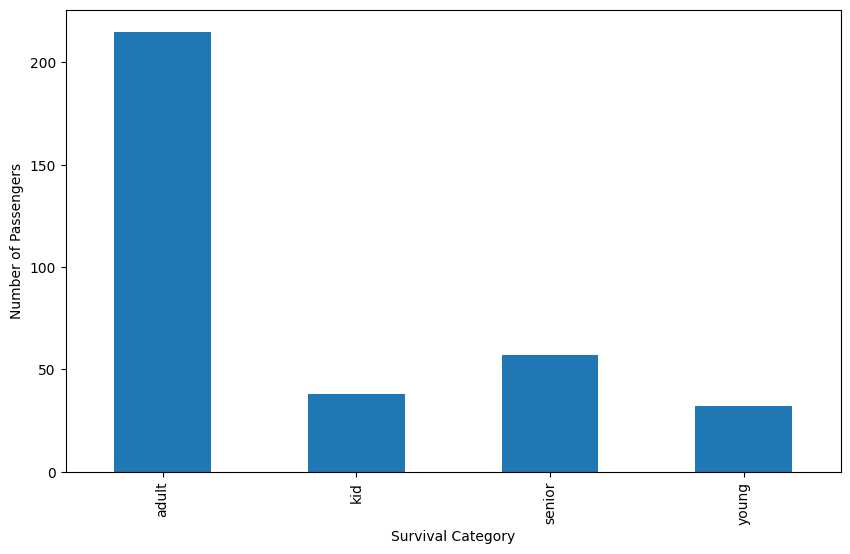

In [92]:
survival_category.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Survival Category')
plt.ylabel('Number of Passengers')
plt.show()

## j) Graficar los sobrevivientes por género en un gráfico de torta

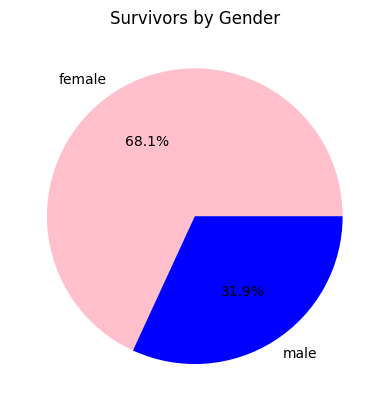

In [93]:
survival_count = df.groupby('Sex')['Survived'].sum()

plt.pie(survival_count.values, labels=survival_count.index, colors=['pink', 'blue'], autopct='%1.1f%%')
plt.title('Survivors by Gender')
plt.show()

## k) Graficar correlación entre las variables “Survived” y “Fare”

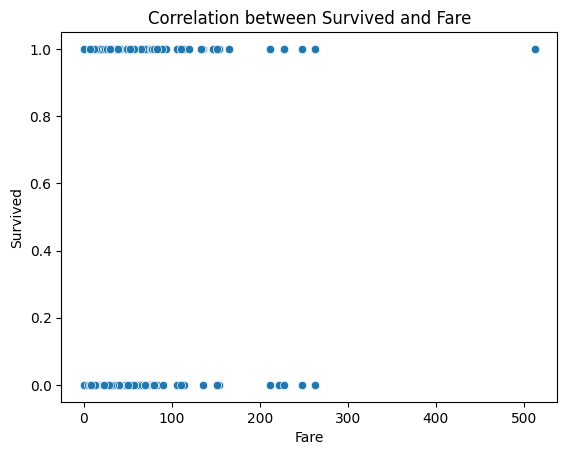

In [94]:
sns.scatterplot(data=df, x='Fare', y='Survived')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Fare')
plt.show()

## l) Graficar correlación entre las variables “Age” y “Fare”

<Axes: xlabel='Fare', ylabel='Age'>

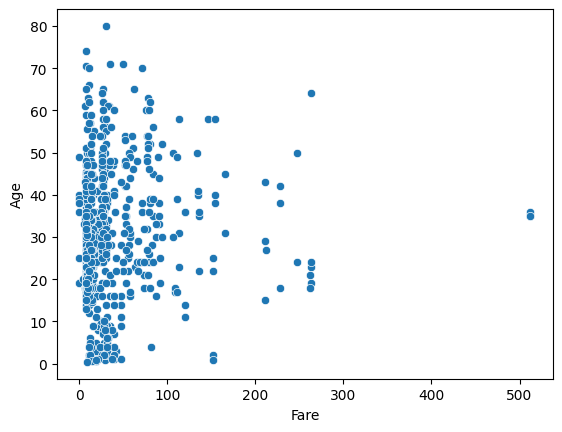

In [95]:
sns.scatterplot(data=df, x='Fare', y='Age')